<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/cnnlstm%20PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
import yfinance as yf


In [ ]:
stock= yf.download("AAPL")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# filename = 'AAPL'
# stock = pd.read_csv('Data/' + filename + '.csv')
# scaler = preprocessing.MinMaxScaler()
# scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
# stock.iloc[:,1:4] = scaled_values
#
# y_scaler = preprocessing.MinMaxScaler()
# scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
# stock.iloc[:,4] = scaled_values
#
# scaler = preprocessing.MinMaxScaler()
# scaled_values = scaler.fit_transform(stock.iloc[:,5:])
# stock.iloc[:,5:] = scaled_values

In [ ]:
window_size = 50
week = 7
X = []
Y = []

for i in range(0 , len(stock) - window_size -1 , 1):
    first = stock.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((stock.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((stock.iloc[i +window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1,1))
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)
# train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2,shuffle=True)

In [ ]:
print(len(train_X))
print(len(test_X))
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
# valid_label = np.array(valid_label)
# valid_X = np.array(valid_X)
train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)

9682
1076


In [ ]:
model = Sequential()
#add model layers
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,50,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(200,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=40,batch_size=64,shuffle =False)
print(model.evaluate(test_X,test_label))
# model.summary()

Epoch 1/40
152/152 [==============================] - 26s 21ms/step - loss: 0.0229 - val_loss: 0.0034
Epoch 2/40
152/152 [==============================] - 2s 11ms/step - loss: 0.0098 - val_loss: 0.0022
Epoch 3/40
152/152 [==============================] - 1s 10ms/step - loss: 0.0080 - val_loss: 0.0021
Epoch 4/40
152/152 [==============================] - 2s 10ms/step - loss: 0.0070 - val_loss: 0.0021
Epoch 5/40
152/152 [==============================] - 2s 11ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 6/40
152/152 [==============================] - 2s 13ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 7/40
152/152 [==============================] - 1s 10ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 8/40
152/152 [==============================] - 2s 10ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 9/40
152/152 [==============================] - 1s 10ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 10/40
152/152 [==============================] - 2s 10ms/step - loss: 0.0061 - val_l

In [ ]:
predicted  = model.predict(test_X)
test_label = (test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

34/34 [==============================] - 2s 5ms/step


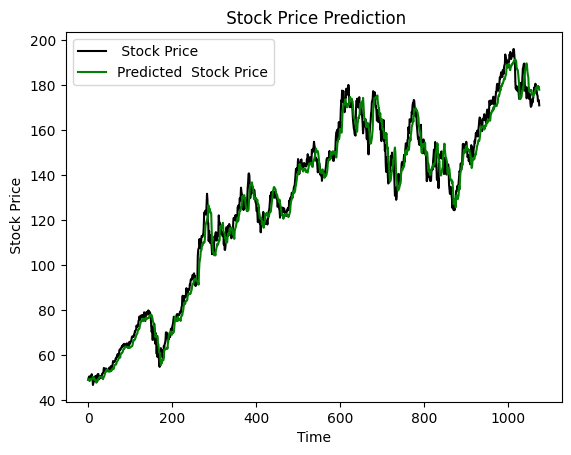

In [ ]:
plt.plot(test_label, color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()
# predicted  = model.predict(test_X)
# test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
# predicted = np.array(predicted[:,0]).reshape(-1,1)
# predicted = y_scaler.inverse_transform(predicted)
# plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
# plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
# plt.title(' Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel(' Stock Price')
# plt.legend()
# plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test_label, predicted)
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)

# Print results
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 4.125315336489766
MSE: 28.092676904731377
RMSE: 5.300252532165932


In [ ]:
import matplotlib.pyplot as plt

# Predict stock prices for next 12 days
future_days = 12
future_predictions = []
last_window = X[-1]
for i in range(future_days):
    pred = model.predict(last_window.reshape(1, 50, 1))[0][0]
    future_predictions.append(pred)
    last_window = np.roll(last_window, -1)
    last_window[-1] = pred

# Plot predicted stock prices
plt.plot(stock.index[-len(test_X):], test_label, label='Actual')
plt.plot(stock.index[-len(test_X):], predicted, label='Predicted')
plt.plot(pd.date_range(start=stock.index[-1], periods=future_days+1)[1:], future_predictions, label='Future Predictions')
plt.legend()
plt.show()



ValueError: ignored